# Ejercicio 2

Repetir el ejemplo con los datos datasets::trees de R que proporciona mediciones del diámetro, altura y volumen de madera en 31 cerezos negros talados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('trees.csv')
data

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


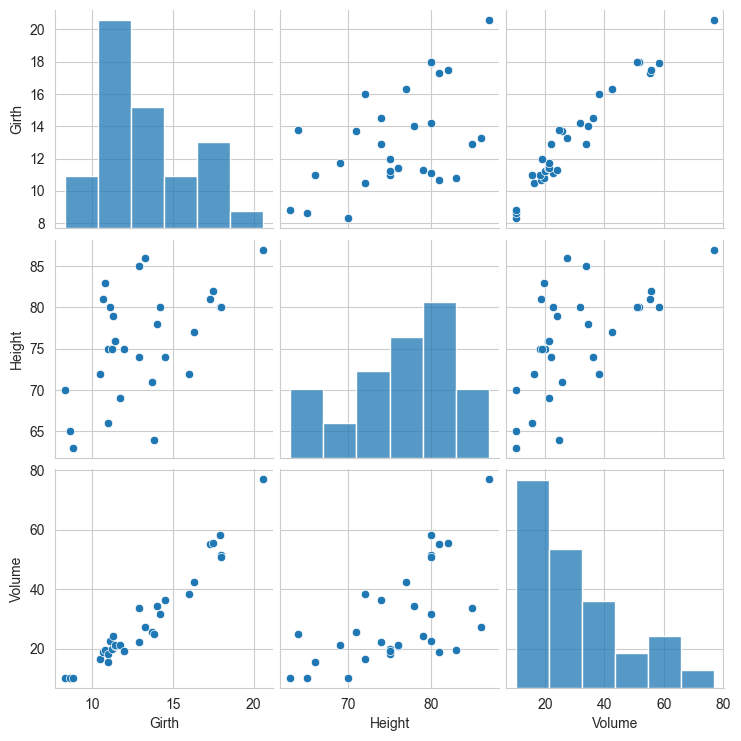

In [5]:
sns.pairplot(data)

In [7]:
n = data.shape[0]

x = np.concatenate([np.ones((n, 1)), data[['Girth', 'Height']]], axis=1)

In [9]:
y = data[['Volume']].to_numpy()

## Modelo de Regresión Lineal Manual

In [10]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y
beta

array([[-57.98765892],
       [  4.7081605 ],
       [  0.33925123]])

## Modelo de Regresión Lineal

In [11]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

### SSE

In [12]:
SSE = y.T @ y - beta.T @ x.T @ y
SSE

array([[421.92135922]])

### Estimación de Varianza

In [13]:
varest = SSE / (n - beta.shape[0])
varest

array([[15.06861997]])

### $R^2$

In [14]:
model.score(x, y)

0.9479500377816745

## Gráfica

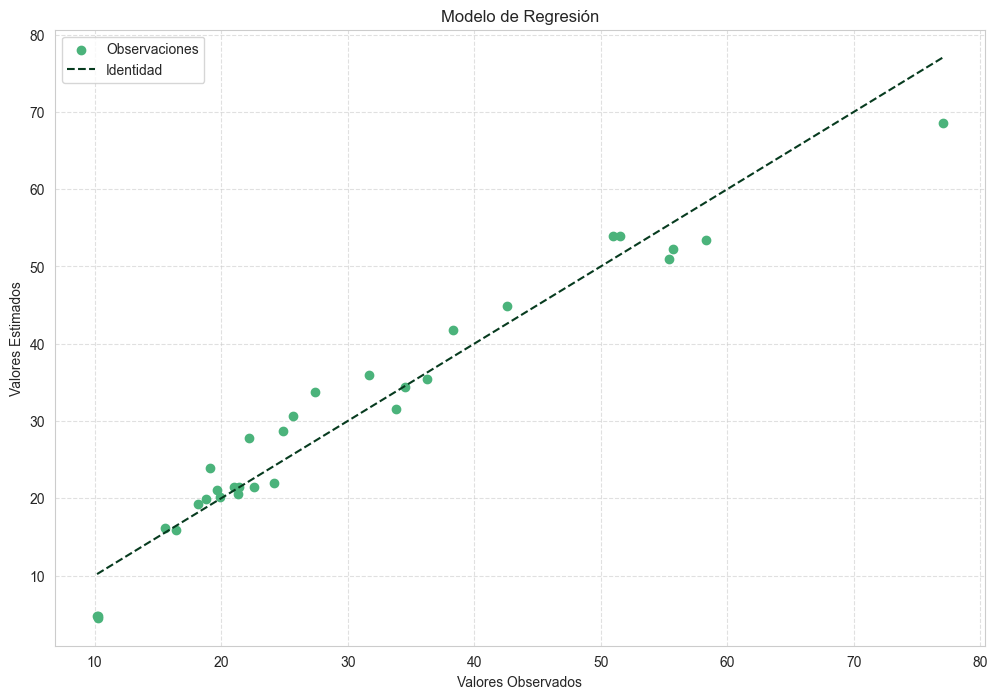

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(x=y, y=y_pred, c='#4bb37b', label='Observaciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="#073b1f", linestyle="--", label="Identidad")
plt.xlabel("Valores Observados")
plt.ylabel("Valores Estimados")
plt.title("Modelo de Regresión")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()